# The Kelly Criterion Trading Strategy  

Reference: Andrew Brown, https://www.youtube.com/watch?v=1yqsvvhzoV0

In practical application of the Kelly strategy across different stocks or ETFs, investors often draw inspiration from successful practitioners such as Warren Buffett, Charlie Munger, and Mohnish Pabrai, who utilize the Kelly Criterion as a guide to determine the size of their investments. 

The Kelly Criterion is a mathematical formula that helps allocate capital optimally based on the perceived edge in a given **profitable** investment opportunity.

For instance, in a simple game scenario of a dollar, the Kelly Percentage is calculated as follows:

<center>$K = \text{Probability of Winning} − \frac{(1 - \text{Probability of Winning})}{\text{Winnings as a Percent}}$</center>

Suppose the calculated Kelly Percentage is 0.167 or 17% of the available balance. This means that for the first bet in the game, it would be wise to wager 17 cents. The beauty of the Kelly Criterion lies in its ability to provide a systematic approach that helps prevent significant capital loss, allowing investors to stay in the game even after a loss.

Importantly, the Kelly Formula is most effective when applied to situations with a profitable opportunity, where the odds are in favor, and potential gains outweigh potential losses. This aligns with the principles of the stock market and various investments.

To illustrate this in the context of the stock market, let's consider a stock with a win probability of 45% and a loss probability of 55%, with the potential gain being a conservative estimate of a 150% increase in stock price, the investor applies the Kelly Formula:

<center>$\text{K} = 0.45 - \frac{(1-0.45)}{1.5}$</center>

For this example, the calculated Kelly Percentage is 0.083 or 8%. This indicates the proportion of the investor's available capital that would be judiciously allocated to this particular investment opportunity, considering the perceived risks and rewards.

In conclusion, while no investing system is infallible, the Kelly formula serves as a valuable tool to allocate funds effectively to opportunities with favorable risk-reward profiles. It empowers investors to be more decisive, particularly when faced with high-reward opportunities where the odds are in their favor. The key is to apply the formula judiciously, considering the specific characteristics of each investment and the overall portfolio strategy.

### SPX Implementation by Yves Hilpisch

Reference: Python for Algorithmic Trading book by O'Reilly

Import the required libraries: Pandas for data manipulation, NumPy for numerical operations, Math for mathematical functions, and Matplotlib for plotting. The 'equs' list is initialized to store equity-related column names.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Initialize equs
equs = []


The kelly_strategy function implements the Kelly strategy for a given dataset (data) and fraction (f).
It calculates equity and capital values based on the Kelly criterion for optimal capital allocation. The calculations within the loop closely resemble the dynamics of the Kelly Criterion, where the growth of capital and equity is influenced by the returns and the chosen fraction.

In [2]:
def kelly_strategy(data, f):
    global equs # This is a list to store equity-related column names

    # Create column names for equity and capital based on the given fraction (f)
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    
    # Initialize equity and capital columns with initial values
    data[equ] = 1
    data[cap] = data[equ] * f
    
    # Iterate over the index of the DataFrame (excluding the first element)
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        
        # Calculate the capital at time 't' based on the previous capital and return
        data.loc[t, cap] = data[cap].loc[t_1] * \
                            math.exp(data['returns'].loc[t])

        # Calculate the equity at time 't' based on the change in capital and previous equity
        data.loc[t, equ] = data[cap].loc[t] - \
                            data[cap].loc[t_1] + \
                            data[equ].loc[t_1]
        
        # Update the capital at time 't' to be the same as the equity scaled by the fraction (f)
        data.loc[t, cap] = data[equ].loc[t] * f

Load financial data from a CSV file into a Pandas DataFrame (raw), e.g. 'tr_eikon_eod_data.csv' is from Python for Finance -- Mastering Data-Driven Finance (2nd edition) by Yves Hilpisch. 

Select a specific financial instrument with the symbol '.SPX', creates a new DataFrame (data) and log returns are calculated and NaN values are dropped.

In [3]:
# Load data from CSV
raw = pd.read_csv('data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

symbol = '.SPX'
data = pd.DataFrame(raw[symbol])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data.tail()

,.SPX,returns
Date,,
2017-10-25,2557.15,-0.004674
2017-10-26,2560.40,0.001270
2017-10-27,2581.07,0.008041
2017-10-30,2572.83,-0.003198
2017-10-31,2575.26,0.000944


Here are the parameters to derive fraction f for the Kelly strategy:
1. mu = Annualized mean 
2. sigma = standard deviation of log returns
3. Risk-free rate (r) is set to 0.
4. Fraction (f) for the Kelly strategy is calculated based on the mean, standard deviation, and risk-free rate.

In [4]:
mu = data.returns.mean() * 252
mu

0.10497958736209669

In [5]:
sigma = data.returns.std() * 252 ** 0.5
sigma

0.14873313291524654

In [6]:
r = 0.00  # Risk-free rate
f = (mu - r) / sigma ** 2
f

4.745581205295807

In [7]:
# Apply the Kelly strategy for different fractions and scaling f down by 0.66 and 0.5.
kelly_strategy(data, f * 0.5)
kelly_strategy(data, f * 0.66)
kelly_strategy(data, f)

# Print the last rows of the data DataFrame with equity values
print(data[equs].tail())

            equity_2.37  equity_3.13  equity_4.75
Date                                             
2017-10-25     5.158598     7.078804     9.832185
2017-10-26     5.174155     7.106983     9.891486
2017-10-27     5.273268     7.286684    10.270438
2017-10-30     5.233323     7.213824    10.114839
2017-10-31     5.245051     7.235164    10.160175


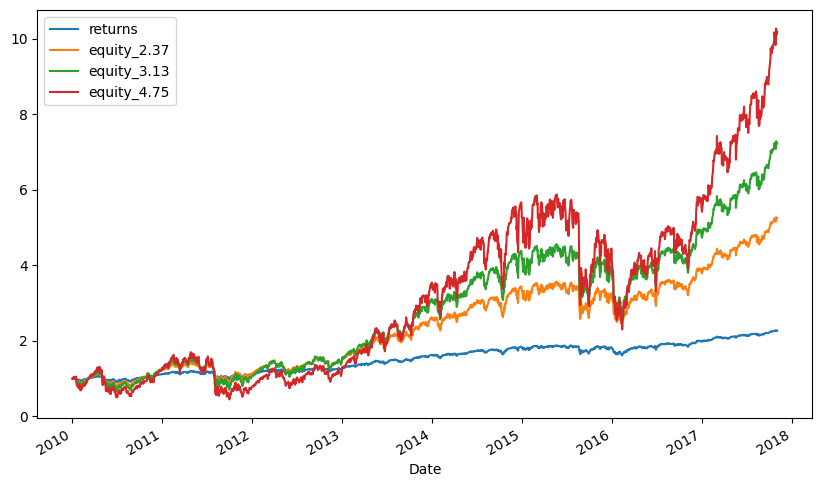

In [8]:
# Plot cumulative returns and equity values
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10, 6))
data[equs].plot(ax=ax, legend=True)

plt.show()

Equity values for the given dates and fractions (equity_2.37, equity_3.13, equity_4.75) show an increasing trend over the specified period. Despite minor fluctuations, the overall pattern demonstrates growth. 

The data DataFrame with equity values reinforces the positive trajectory of the equity values for the specified fractions. This suggests that the Kelly strategy applied with fractions 2.37, 3.13, and 4.75 has resulted in increasing equity over the years 2010 - 2018.